# Import libraries

In [33]:
import os
import datawig
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import impyute as impy
import miceforest as mf

from statsmodels.multivariate.pca import PCA
from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

from MissForest import MissForest

# Vitals

## Read data

In [2]:
path = os.getcwd() + '/../../data/mimic_omop_selected_vitals.csv'
dataDf = pd.read_csv(path)

In [3]:
dataDf.head()

,Unnamed: 0,visit_occurrence_id,heartrate,sysbp,diabp,meanbp,resprate,tempc,spo2,gcseye,gcsverbal,gcsmotor
0,0,-2147462198,100.764706,112.764706,77.411765,88.823529,19.941176,36.788889,97.470588,4.0,5.0,6.0
1,1,-2147363710,92.400000,106.640000,54.840000,70.120000,13.942857,36.886957,97.600000,2.5,3.0,3.5
2,2,-2147110420,67.761905,109.842105,41.578947,56.736842,17.916667,36.016667,99.950000,2.0,1.0,2.5
3,3,-2147080626,127.925926,116.291667,72.708333,82.375000,29.185185,37.222222,94.115385,4.0,5.0,6.0
4,4,-2147002424,101.370370,103.840000,57.200000,71.480000,22.851852,36.666667,148.333333,4.0,4.4,6.0


In [4]:
dataDf = dataDf.iloc[: , 1:]
dataDf.set_index('visit_occurrence_id', inplace=True)

In [5]:
dataDf.head()

,heartrate,sysbp,diabp,meanbp,resprate,tempc,spo2,gcseye,gcsverbal,gcsmotor
visit_occurrence_id,,,,,,,,,,
-2147462198,100.764706,112.764706,77.411765,88.823529,19.941176,36.788889,97.470588,4.0,5.0,6.0
-2147363710,92.400000,106.640000,54.840000,70.120000,13.942857,36.886957,97.600000,2.5,3.0,3.5
-2147110420,67.761905,109.842105,41.578947,56.736842,17.916667,36.016667,99.950000,2.0,1.0,2.5
-2147080626,127.925926,116.291667,72.708333,82.375000,29.185185,37.222222,94.115385,4.0,5.0,6.0
-2147002424,101.370370,103.840000,57.200000,71.480000,22.851852,36.666667,148.333333,4.0,4.4,6.0


## Vusualize missingness

<AxesSubplot:>

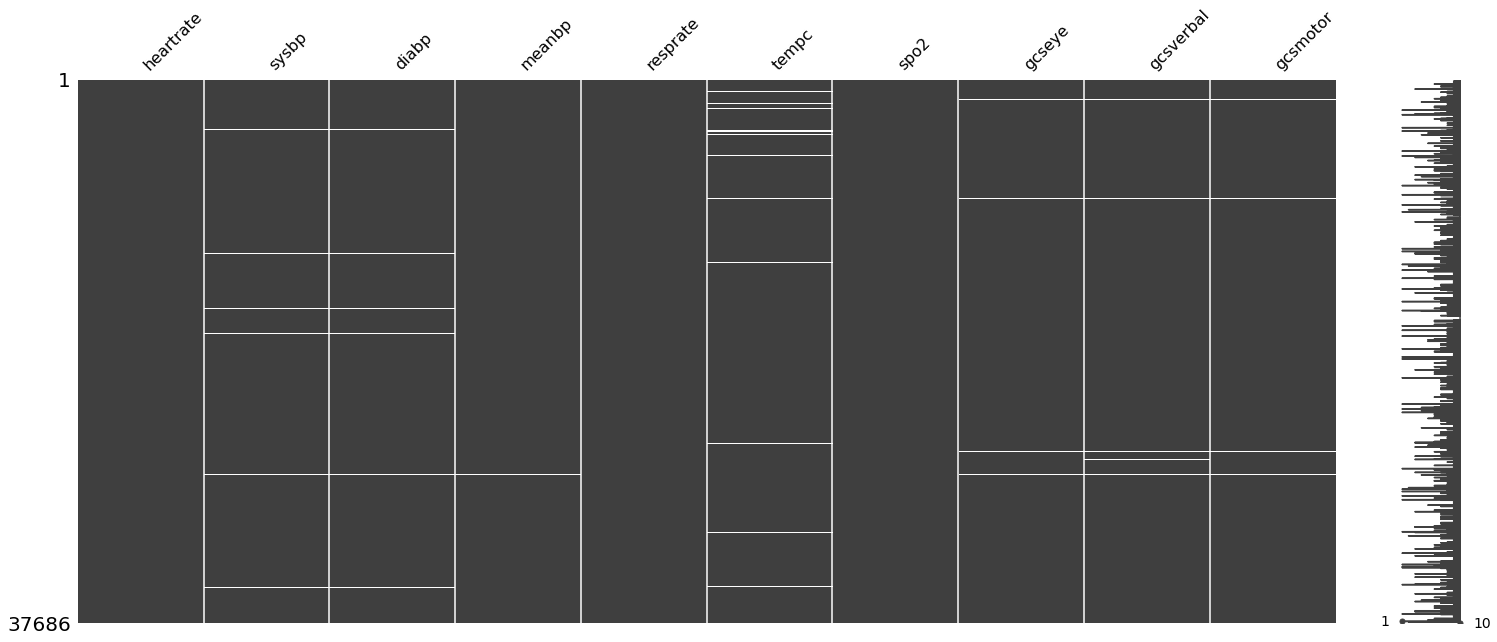

In [6]:
msno.matrix(dataDf)

<AxesSubplot:>

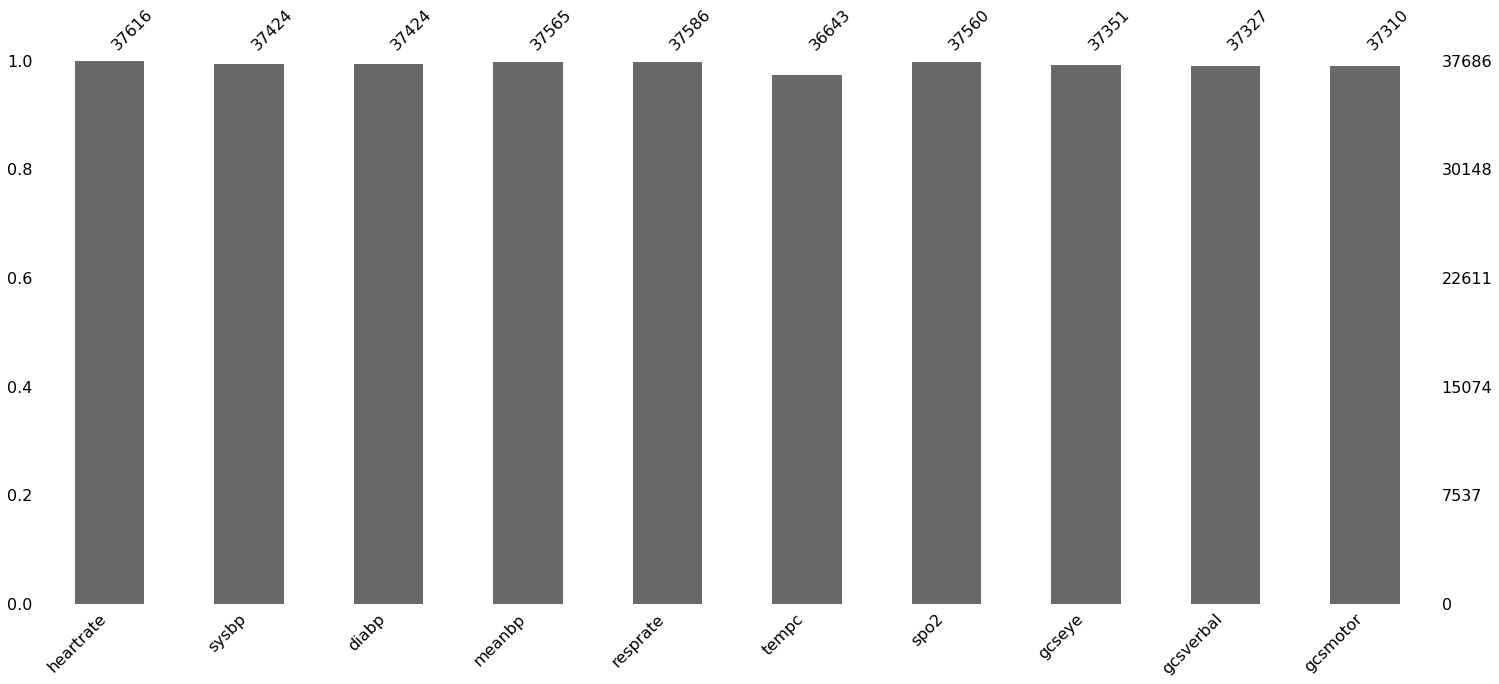

In [7]:
msno.bar(dataDf)

In [8]:
missingSeries = dataDf.isna().sum().sort_values()
ind_missing = []
overall_missing = []
cols = []
for index, value in missingSeries.items():
    if not index.startswith('admission_weight_'):
        cols.append(index)
        ind_missing.append(100 - round(value/dataDf.shape[0]*100, 2))
        overall_missing.append(round(dataDf[cols].dropna().shape[0] / dataDf.shape[0] * 100, 2))

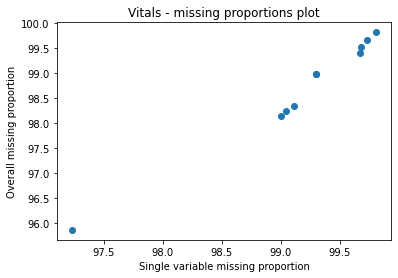

In [9]:
plt.scatter(x=ind_missing, y=overall_missing)
plt.title("Vitals - missing proportions plot")
plt.xlabel("Single variable missing proportion")
plt.ylabel("Overall missing proportion")
plt.show()

## Simple imputer

### Mean

In [10]:
imputer = SimpleImputer(strategy='mean')

In [11]:
meanImputedData = imputer.fit_transform(dataDf)

In [12]:
meanImputedDataDf = pd.DataFrame(meanImputedData, columns=[(col + '_mean') for col in dataDf.columns], index=dataDf.index)

In [13]:
meanImputedDataDf.head()

,heartrate_mean,sysbp_mean,diabp_mean,meanbp_mean,resprate_mean,tempc_mean,spo2_mean,gcseye_mean,gcsverbal_mean,gcsmotor_mean
visit_occurrence_id,,,,,,,,,,
-2147462198,100.764706,112.764706,77.411765,88.823529,19.941176,36.788889,97.470588,4.0,5.0,6.0
-2147363710,92.400000,106.640000,54.840000,70.120000,13.942857,36.886957,97.600000,2.5,3.0,3.5
-2147110420,67.761905,109.842105,41.578947,56.736842,17.916667,36.016667,99.950000,2.0,1.0,2.5
-2147080626,127.925926,116.291667,72.708333,82.375000,29.185185,37.222222,94.115385,4.0,5.0,6.0
-2147002424,101.370370,103.840000,57.200000,71.480000,22.851852,36.666667,148.333333,4.0,4.4,6.0


### Median

In [14]:
imputer = SimpleImputer(strategy='median')

In [15]:
medianImputedData = imputer.fit_transform(dataDf)

In [16]:
medianImputedDataDf = pd.DataFrame(medianImputedData, columns=[(col + '_median') for col in dataDf.columns], index=dataDf.index)

In [17]:
medianImputedDataDf.head()

,heartrate_median,sysbp_median,diabp_median,meanbp_median,resprate_median,tempc_median,spo2_median,gcseye_median,gcsverbal_median,gcsmotor_median
visit_occurrence_id,,,,,,,,,,
-2147462198,100.764706,112.764706,77.411765,88.823529,19.941176,36.788889,97.470588,4.0,5.0,6.0
-2147363710,92.400000,106.640000,54.840000,70.120000,13.942857,36.886957,97.600000,2.5,3.0,3.5
-2147110420,67.761905,109.842105,41.578947,56.736842,17.916667,36.016667,99.950000,2.0,1.0,2.5
-2147080626,127.925926,116.291667,72.708333,82.375000,29.185185,37.222222,94.115385,4.0,5.0,6.0
-2147002424,101.370370,103.840000,57.200000,71.480000,22.851852,36.666667,148.333333,4.0,4.4,6.0


## KNN imputer

In [18]:
imputer = KNNImputer()

In [19]:
knnImputedData = imputer.fit_transform(dataDf)

In [20]:
knnImputedDataDf = pd.DataFrame(knnImputedData, columns=[(col + '_knn') for col in dataDf.columns], index=dataDf.index)

In [21]:
knnImputedDataDf.head()

,heartrate_knn,sysbp_knn,diabp_knn,meanbp_knn,resprate_knn,tempc_knn,spo2_knn,gcseye_knn,gcsverbal_knn,gcsmotor_knn
visit_occurrence_id,,,,,,,,,,
-2147462198,100.764706,112.764706,77.411765,88.823529,19.941176,36.788889,97.470588,4.0,5.0,6.0
-2147363710,92.400000,106.640000,54.840000,70.120000,13.942857,36.886957,97.600000,2.5,3.0,3.5
-2147110420,67.761905,109.842105,41.578947,56.736842,17.916667,36.016667,99.950000,2.0,1.0,2.5
-2147080626,127.925926,116.291667,72.708333,82.375000,29.185185,37.222222,94.115385,4.0,5.0,6.0
-2147002424,101.370370,103.840000,57.200000,71.480000,22.851852,36.666667,148.333333,4.0,4.4,6.0


## MissForest Imputer

In [22]:
imputer = MissForest()

In [23]:
mfImputedData = imputer.fit_transform(dataDf)

Iteration: 0
Iteration: 1
Iteration: 2


In [24]:
mfImputedDataDf = pd.DataFrame(mfImputedData, columns=[(col + '_mf') for col in dataDf.columns], index=dataDf.index)

In [25]:
mfImputedDataDf.head()

,heartrate_mf,sysbp_mf,diabp_mf,meanbp_mf,resprate_mf,tempc_mf,spo2_mf,gcseye_mf,gcsverbal_mf,gcsmotor_mf
visit_occurrence_id,,,,,,,,,,
-2147462198,100.764706,112.764706,77.411765,88.823529,19.941176,36.788889,97.470588,4.0,5.0,6.0
-2147363710,92.400000,106.640000,54.840000,70.120000,13.942857,36.886957,97.600000,2.5,3.0,3.5
-2147110420,67.761905,109.842105,41.578947,56.736842,17.916667,36.016667,99.950000,2.0,1.0,2.5
-2147080626,127.925926,116.291667,72.708333,82.375000,29.185185,37.222222,94.115385,4.0,5.0,6.0
-2147002424,101.370370,103.840000,57.200000,71.480000,22.851852,36.666667,148.333333,4.0,4.4,6.0


## NIPALS PCA imputer

In [34]:
pc = PCA(data=dataDf, ncomp=1, missing='fill-em', method='nipals')
nipalsImputedDf = pd.DataFrame(pc._adjusted_data)

In [35]:
nipalsImputedDf.head()

,0,1,2,3,4,5,6,7,8,9
0,100.764706,112.764706,77.411765,88.823529,19.941176,36.788889,97.470588,4.0,5.0,6.0
1,92.400000,106.640000,54.840000,70.120000,13.942857,36.886957,97.600000,2.5,3.0,3.5
2,67.761905,109.842105,41.578947,56.736842,17.916667,36.016667,99.950000,2.0,1.0,2.5
3,127.925926,116.291667,72.708333,82.375000,29.185185,37.222222,94.115385,4.0,5.0,6.0
4,101.370370,103.840000,57.200000,71.480000,22.851852,36.666667,148.333333,4.0,4.4,6.0


In [36]:
nipalsImputedDataDf = pd.DataFrame(nipalsImputedDf.to_numpy(), columns=[(col + '_nipals') for col in dataDf.columns], index=dataDf.index)
nipalsImputedDataDf

,heartrate_nipals,sysbp_nipals,diabp_nipals,meanbp_nipals,resprate_nipals,tempc_nipals,spo2_nipals,gcseye_nipals,gcsverbal_nipals,gcsmotor_nipals
visit_occurrence_id,,,,,,,,,,
-2147462198,100.764706,112.764706,77.411765,88.823529,19.941176,36.788889,97.470588,4.000000,5.00,6.000000
-2147363710,92.400000,106.640000,54.840000,70.120000,13.942857,36.886957,97.600000,2.500000,3.00,3.500000
-2147110420,67.761905,109.842105,41.578947,56.736842,17.916667,36.016667,99.950000,2.000000,1.00,2.500000
-2147080626,127.925926,116.291667,72.708333,82.375000,29.185185,37.222222,94.115385,4.000000,5.00,6.000000
-2147002424,101.370370,103.840000,57.200000,71.480000,22.851852,36.666667,148.333333,4.000000,4.40,6.000000
...,...,...,...,...,...,...,...,...,...,...
2146997827,65.411765,121.352941,67.823529,80.058824,13.882353,36.527778,97.117647,4.000000,5.00,6.000000
2147088481,124.285714,146.538462,90.384615,104.076923,33.571429,38.524691,94.714286,4.000000,3.25,4.500000
2147275831,119.307692,99.033333,61.766667,75.700000,21.914894,38.251667,99.230769,2.285714,1.00,2.285714


## datawig imputer

In [38]:
# dwImputedDf = datawig.SimpleImputer.complete(dataDf)

In [39]:
# dwImputedDf = pd.DataFrame(dwImputedDf.to_numpy(), columns=[(col + '_dw') for col in dataDf.columns], index=dataDf.index)
# dwImputedDf

## Expectation Maximization imputer

In [40]:
emImputedData = impy.em(dataDf.to_numpy())

In [41]:
emImputedDataDf = pd.DataFrame(emImputedData, columns=[(col + '_em') for col in dataDf.columns], index=dataDf.index)

In [42]:
emImputedDataDf.head()

,heartrate_em,sysbp_em,diabp_em,meanbp_em,resprate_em,tempc_em,spo2_em,gcseye_em,gcsverbal_em,gcsmotor_em
visit_occurrence_id,,,,,,,,,,
-2147462198,100.764706,112.764706,77.411765,88.823529,19.941176,36.788889,97.470588,4.0,5.0,6.0
-2147363710,92.400000,106.640000,54.840000,70.120000,13.942857,36.886957,97.600000,2.5,3.0,3.5
-2147110420,67.761905,109.842105,41.578947,56.736842,17.916667,36.016667,99.950000,2.0,1.0,2.5
-2147080626,127.925926,116.291667,72.708333,82.375000,29.185185,37.222222,94.115385,4.0,5.0,6.0
-2147002424,101.370370,103.840000,57.200000,71.480000,22.851852,36.666667,148.333333,4.0,4.4,6.0


## Multiple Imputation imputer

In [43]:
# Create kernel. 
miKernel = mf.ImputationKernel(
  dataDf,
  datasets=4,
  save_all_iterations=True,
  random_state=1
)

# Run the MICE algorithm for 2 iterations on each of the datasets
miKernel.mice(2)

/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/lightgbm/engine.py:240: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


In [44]:
miImputedDataDf = miKernel.complete_data(dataset=0, inplace=False)

In [45]:
miImputedDf = pd.DataFrame(miImputedDataDf.to_numpy(), columns=[(col + '_mi') for col in dataDf.columns], index=dataDf.index)
miImputedDf

,heartrate_mi,sysbp_mi,diabp_mi,meanbp_mi,resprate_mi,tempc_mi,spo2_mi,gcseye_mi,gcsverbal_mi,gcsmotor_mi
visit_occurrence_id,,,,,,,,,,
-2147462198,100.764706,112.764706,77.411765,88.823529,19.941176,36.788889,97.470588,4.000000,5.00,6.000000
-2147363710,92.400000,106.640000,54.840000,70.120000,13.942857,36.886957,97.600000,2.500000,3.00,3.500000
-2147110420,67.761905,109.842105,41.578947,56.736842,17.916667,36.016667,99.950000,2.000000,1.00,2.500000
-2147080626,127.925926,116.291667,72.708333,82.375000,29.185185,37.222222,94.115385,4.000000,5.00,6.000000
-2147002424,101.370370,103.840000,57.200000,71.480000,22.851852,36.666667,148.333333,4.000000,4.40,6.000000
...,...,...,...,...,...,...,...,...,...,...
2146997827,65.411765,121.352941,67.823529,80.058824,13.882353,36.527778,97.117647,4.000000,5.00,6.000000
2147088481,124.285714,146.538462,90.384615,104.076923,33.571429,38.524691,94.714286,4.000000,3.25,4.500000
2147275831,119.307692,99.033333,61.766667,75.700000,21.914894,38.251667,99.230769,2.285714,1.00,2.285714


## Summary

In [46]:
combinedDf = pd.concat([dataDf, knnImputedDataDf, mfImputedDataDf, meanImputedDataDf, medianImputedDataDf, nipalsImputedDataDf, emImputedDataDf, miImputedDf], axis=1)

In [47]:
dataColumns = dataDf.columns

/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function 

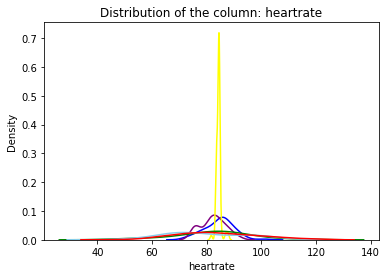

/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function 

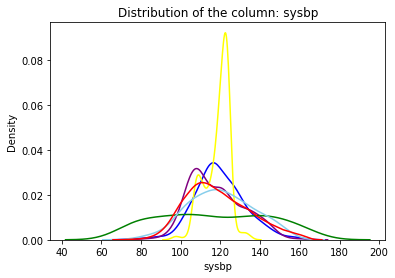

/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function 

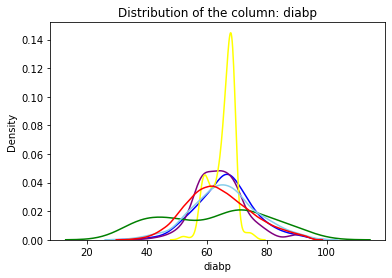

/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function 

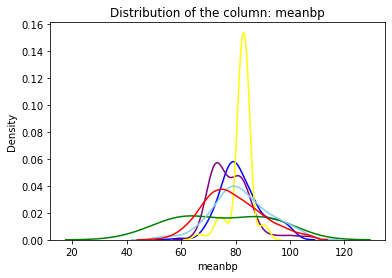

/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function 

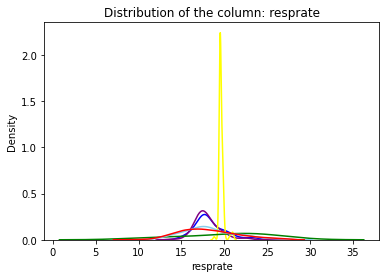

/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function 

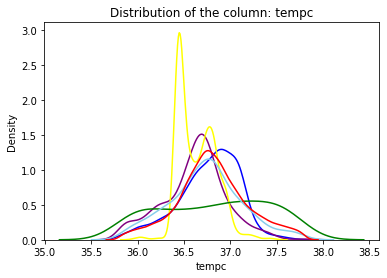

/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function 

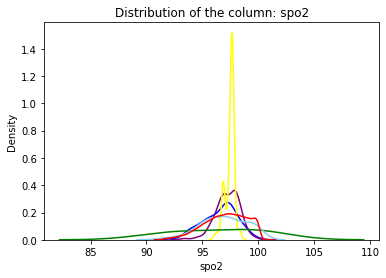

/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function 

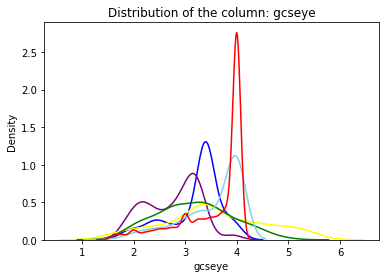

/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function 

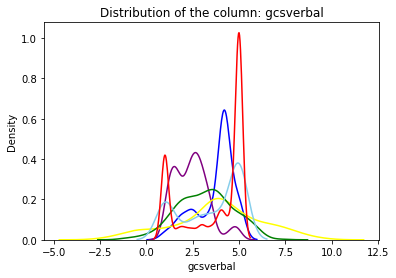

/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function 

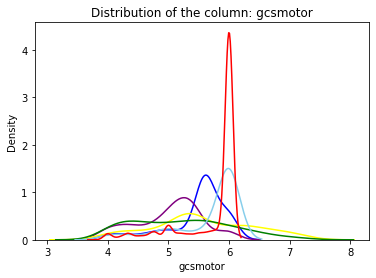

In [48]:
for dataColumn in dataColumns:
    fig, ax = plt.subplots()

    q1 = combinedDf[dataColumn].quantile(0.25)
    q3 = combinedDf[dataColumn].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr

    sns.distplot(
        combinedDf[(combinedDf[dataColumn + '_knn']>fence_low) & (combinedDf[dataColumn + '_knn']<fence_high) & combinedDf[dataColumn].isnull()][dataColumn + '_knn'],
        hist=False,
        color='blue',
        ax=ax
    )
    sns.distplot(
        combinedDf[(combinedDf[dataColumn + '_mf']>fence_low) & (combinedDf[dataColumn + '_mf']<fence_high) & combinedDf[dataColumn].isnull()][dataColumn + '_mf'],
        hist=False,
        color='purple',
        ax=ax
    )
    sns.distplot(
        combinedDf[(combinedDf[dataColumn + '_nipals']>fence_low) & (combinedDf[dataColumn + '_nipals']<fence_high) & combinedDf[dataColumn].isnull()][dataColumn + '_nipals'],
        hist=False,
        color='yellow',
        ax=ax
    )
    # try:
    #     sns.distplot(
    #         combinedDf[(combinedDf[dataColumn + '_dw']>fence_low) & (combinedDf[dataColumn + '_dw']<fence_high) & combinedDf[dataColumn].isnull()][dataColumn + '_dw'],
    #         hist=False,
    #         color='cyan',
    #         ax=ax
    #     )
    # except:
    #     pass
    sns.distplot(
        combinedDf[(combinedDf[dataColumn + '_em']>fence_low) & (combinedDf[dataColumn + '_em']<fence_high) & combinedDf[dataColumn].isnull()][dataColumn + '_em'],
        hist=False,
        color='green',
        ax=ax
    )
    sns.distplot(
        combinedDf[(combinedDf[dataColumn + '_mi']>fence_low) & (combinedDf[dataColumn + '_mi']<fence_high) & combinedDf[dataColumn].isnull()][dataColumn + '_mi'],
        hist=False,
        color='skyblue',
        ax=ax
    )
    sns.distplot(
        combinedDf[(combinedDf[dataColumn]>fence_low) & (combinedDf[dataColumn]<fence_high) & combinedDf[dataColumn].notnull()][dataColumn],
        hist=False,
        color='red',
        ax=ax
    )

    plt.title('Distribution of the column: ' + str(dataColumn))
    plt.show()

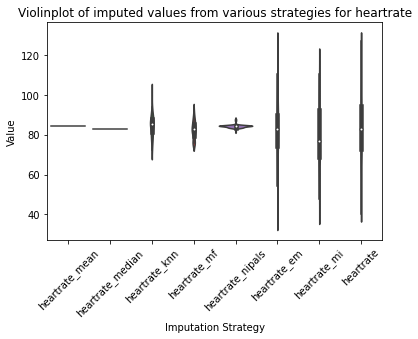

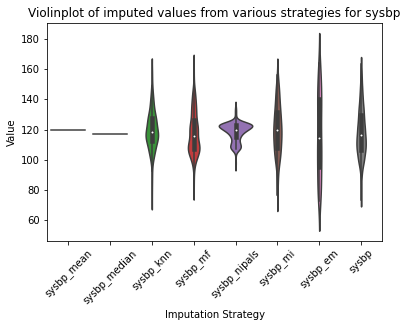

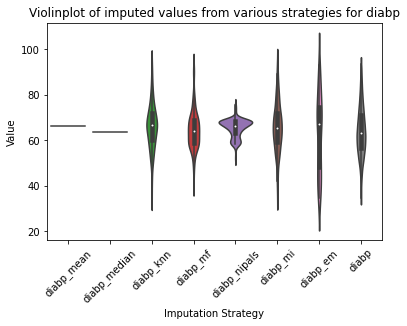

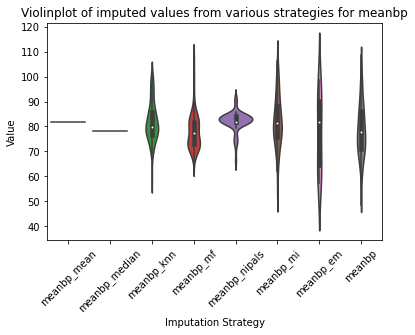

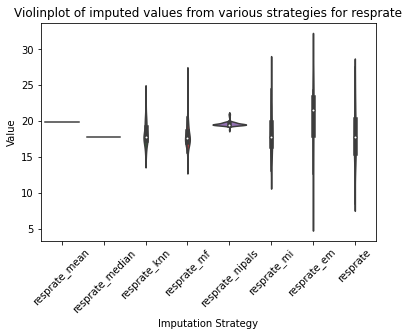

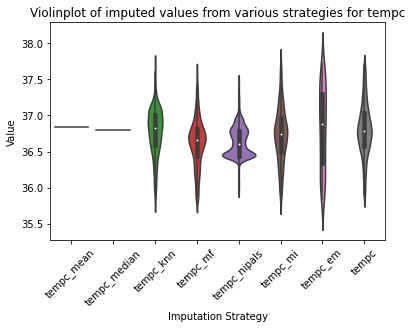

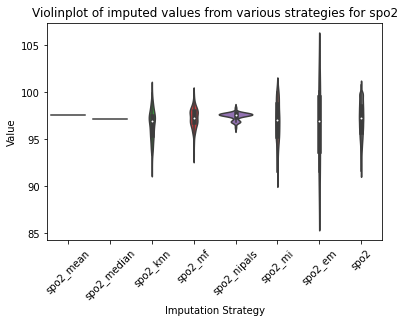

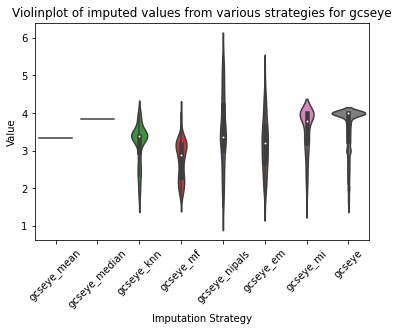

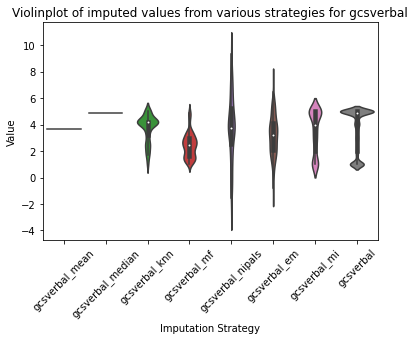

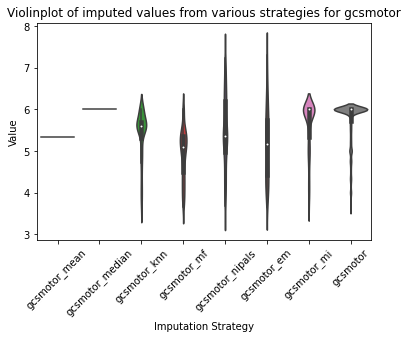

In [52]:
for dataColumn in dataColumns:

    try:
        imputedDf = combinedDf[combinedDf[dataColumn].isnull()][[dataColumn + '_mean', dataColumn + '_median', dataColumn + '_knn', dataColumn + '_mf', dataColumn + '_nipals', dataColumn + '_em', dataColumn + '_mi']]
        plotDf1 = imputedDf.stack().reset_index()
        plotDf1.drop('visit_occurrence_id', inplace=True, axis=1)
        plotDf1.columns = ['label', 'value']
        plotDf2 = combinedDf[combinedDf[dataColumn].notnull()][dataColumn].to_frame()
        plotDf2.reset_index(drop=True, inplace=True)
        plotDf2.columns = ['value']
        plotDf2['label'] = [dataColumn] * plotDf2.shape[0]
        plotDf = plotDf1.append(plotDf2, ignore_index=True)

        fig, ax = plt.subplots()

        q1 = plotDf['value'].quantile(0.25)
        q3 = plotDf['value'].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        sns.violinplot(
            y = plotDf[(plotDf['value']>fence_low) & (plotDf['value']<fence_high)].value,
            x = plotDf[(plotDf['value']>fence_low) & (plotDf['value']<fence_high)].label,
            ax=ax
        )
        plt.title('Violinplot of imputed values from various strategies for ' + dataColumn)
        plt.xlabel('Imputation Strategy')
        plt.ylabel('Value')
        plt.xticks(rotation=45)
        plt.show()
    except:
        print('exception')
        pass

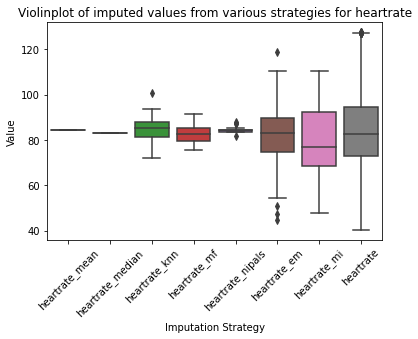

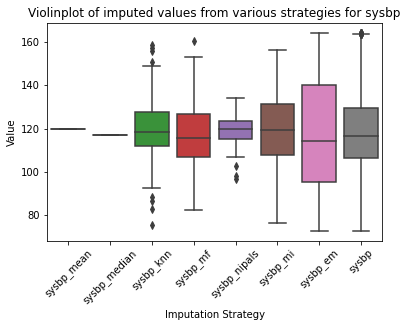

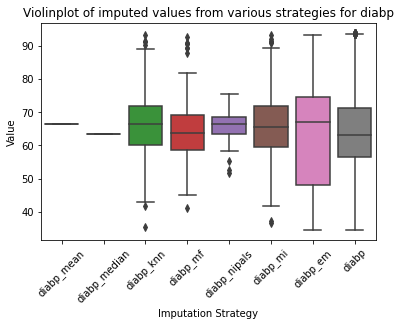

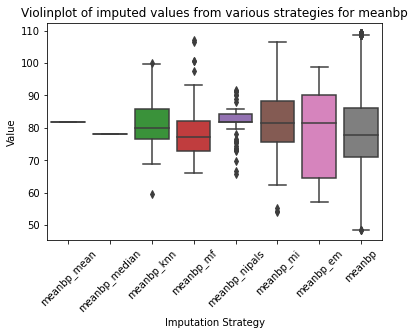

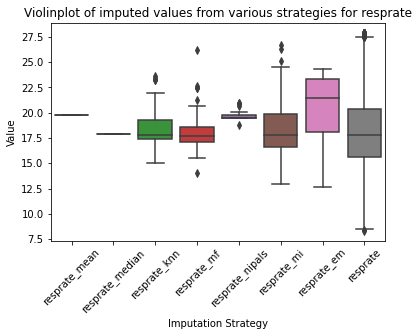

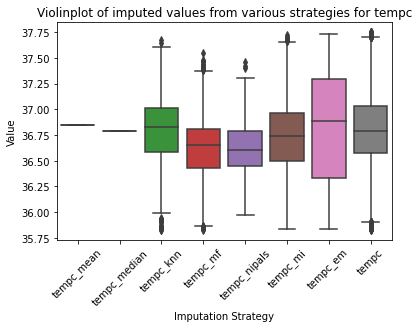

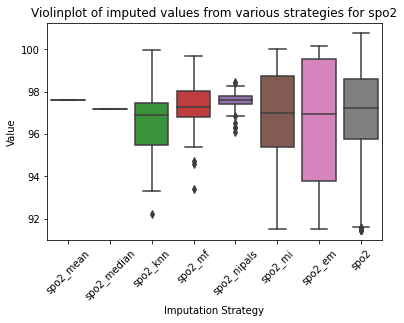

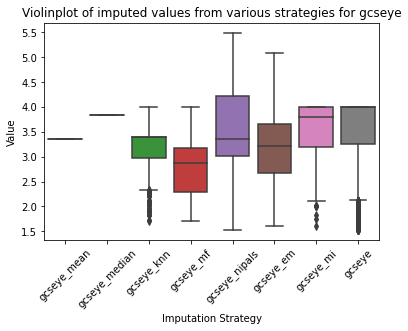

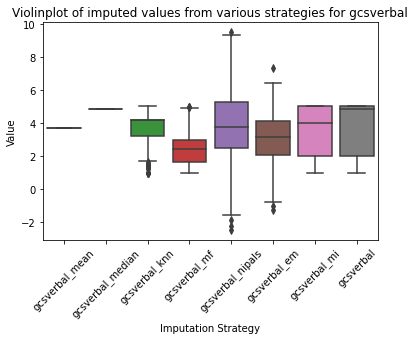

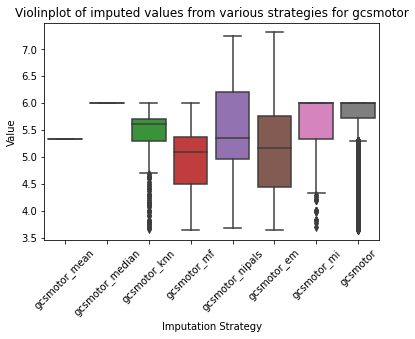

In [53]:
for dataColumn in dataColumns:

    try:
        imputedDf = combinedDf[combinedDf[dataColumn].isnull()][[dataColumn + '_mean', dataColumn + '_median', dataColumn + '_knn', dataColumn + '_mf', dataColumn + '_nipals', dataColumn + '_em', dataColumn + '_mi']]
        plotDf1 = imputedDf.stack().reset_index()
        plotDf1.drop('visit_occurrence_id', inplace=True, axis=1)
        plotDf1.columns = ['label', 'value']
        plotDf2 = combinedDf[combinedDf[dataColumn].notnull()][dataColumn].to_frame()
        plotDf2.reset_index(drop=True, inplace=True)
        plotDf2.columns = ['value']
        plotDf2['label'] = [dataColumn] * plotDf2.shape[0]
        plotDf = plotDf1.append(plotDf2, ignore_index=True)

        fig, ax = plt.subplots()

        q1 = plotDf['value'].quantile(0.25)
        q3 = plotDf['value'].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        sns.boxplot(
            y = plotDf[(plotDf['value']>fence_low) & (plotDf['value']<fence_high)].value,
            x = plotDf[(plotDf['value']>fence_low) & (plotDf['value']<fence_high)].label,
            ax=ax
        )
        plt.title('Violinplot of imputed values from various strategies for ' + dataColumn)
        plt.xlabel('Imputation Strategy')
        plt.ylabel('Value')
        plt.xticks(rotation=45)
        plt.show()
    except:
        pass